### 0. _Import Dependency_
Melakukan _import dependency_ yang diperlukan merupakan langkah awal sebelum melakukan praktikum. Untuk memudahkan mencari _dependency_ apa saja yang telah di-_import_, operasi _import dependency_ dilakukan dalam sebuah _cell_.

#### A. _Install Dependency_
_Install dependency_ tidaklah wajib. Tetapi bisa jadi ada beberapa _dependency_ di bawah ini yang belum terinstall.

In [ ]:
pip install numpy scikit-image matplotlib

#### B. _Import Dependency_

In [2]:
from skimage import color, exposure, filters, io, morphology, util
from skimage.transform import rescale
from skimage.morphology import closing, disk, dilation, erosion, opening
from skimage.morphology import black_tophat, white_tophat
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

#### C. Unduh dan Ekstrasi Dokumen Pendukung

In [3]:
os.system('gdown https://drive.google.com/uc?id=1arpFWWlYwwsfYxXR8Jy8aWKtApKrvmPY')
os.system('unzip Lab\ 3\ -\ Images.zip')

256

### 1. _Structuring Element_ 

Morphological technique probe an image with a shape called structuring element (or kernel). This structuring elemnt is positioned at all possible locations in the image and to conclude how this shape fits or misses in the image. The structuring element can be disk-shaped, rectangular, diamond-shaped, or you can define your own structuring element shape and size in a binary matrix.

Here's an example of structuring element shapes and size. \
![structuring-element.png](img/structuring-element.png)

### 2. Basic Operators 

#### 2.1. Dilation 

Dilation (usually represented $\oplus$) is a process of adding pixels to the boundaries of image. After dilation operation, the image will appear thicker than before. Dilation takes two inpus, the image that will be dilated and the structuring element (also known as kernel).

In [4]:
basePath = 'Lab 3 - Images/'
def getPath(fileName):
    return basePath + fileName

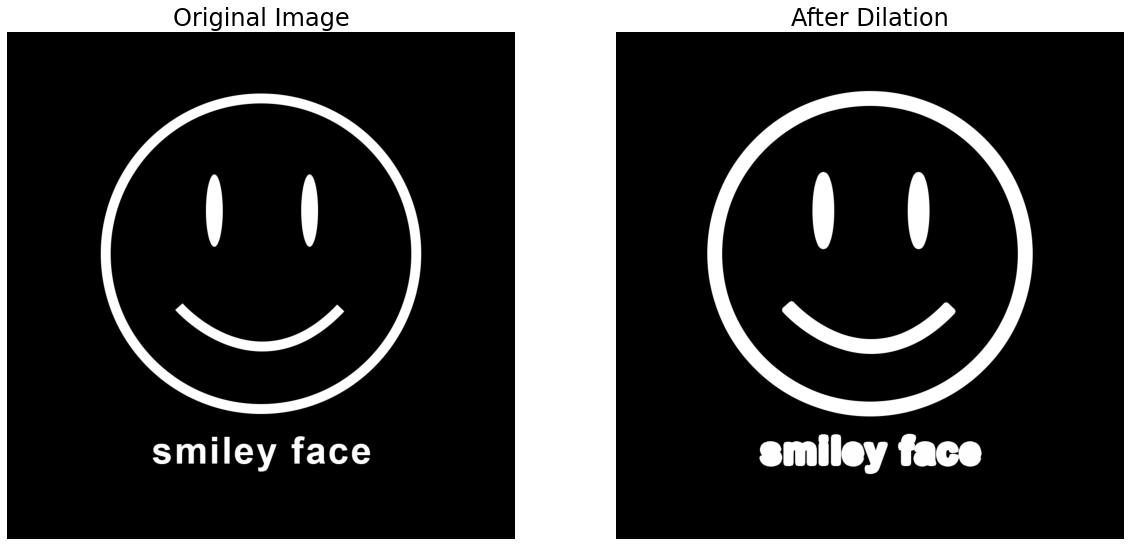

In [11]:
# Import and change image to gray
im = color.rgb2gray(io.imread(getPath('smiley.png')))

# You can change the structuring element (se)
# REad skimage.morphology documentation for more
se = disk(5)
dilated = dilation(im, se)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Dilation')
plt.imshow(dilated, cmap='gray')
plt.axis('off')
plt.show()

#### 2.2. Erosion

Erosion (usually represented by $\ominus$) is the opposite of dilation. It remove pixels on object boundaries. The numeber of pixels removed from the objects depends on the size and shape of the structuring element used. This operation will result thinner image.

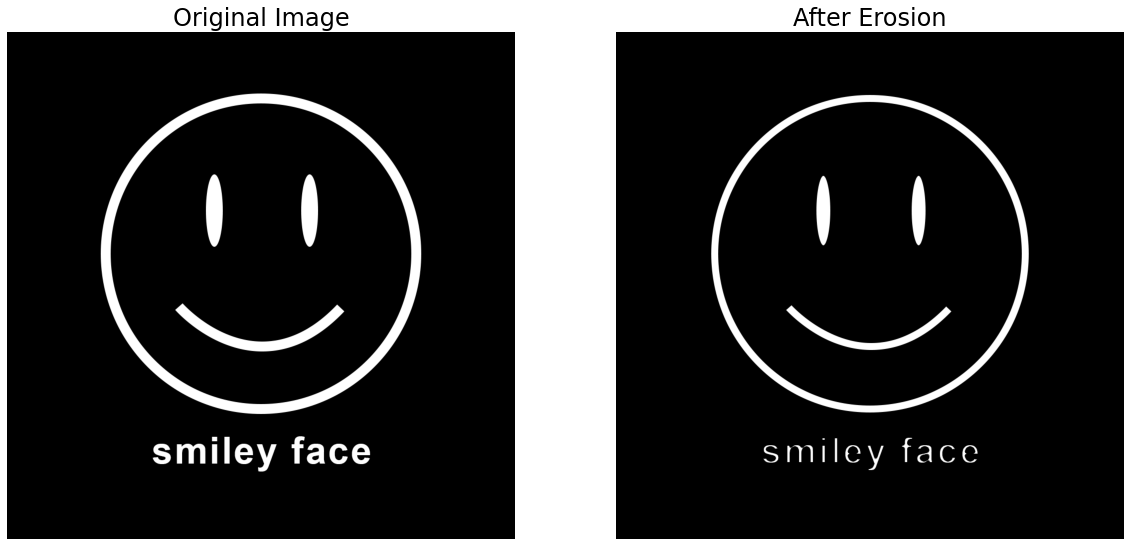

In [17]:
erosion_se = disk(3)
eroded = erosion(im, erosion_se)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=20)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Erosion')
plt.imshow(eroded, cmap='gray')
plt.axis('off')
plt.show()

#### 2.3. Opening 

Opening is an operator derived from the dilatation and erosion operation.To be exact, opening is process of erosion followed by a dilation using the same structuring element. Morphological opening is useful for removing small objects from an image while preserving the shape and size of larger objects in the image.

The equation can be written in the equation below,
$$A \circ B = (A \ominus B) \oplus B$$

where $A$ is the original image, $B$ is the structuring element, $\oplus$ is dilation, and $\ominus$ is erosion. 

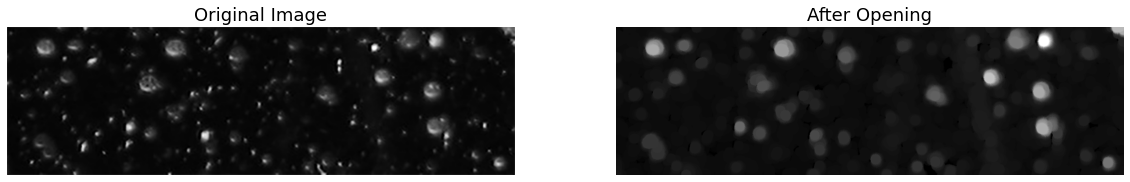

In [23]:
snowflakes_image = color.rgb2gray(color.rgba2rgb(io.imread(getPath('snowflakes.png'))))

opening_se = disk(10)
opened = opening(snowflakes_image, opening_se)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=15)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(snowflakes_image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Opening')
plt.imshow(opened, cmap='gray')
plt.axis('off')
plt.show()

#### 2.4. Closing 

Closing is the opposite of opening. It's a process of dilation followed by erosion using the same structuring element for both operations. Closing is useful for filling small holes from an image while preserving the shape and size of the objects in the image.

The equation can be written in the equation below,
$$A \bullet B = (A \oplus B) \ominus B$$

where $A$ is the original image, $B$ is the structuring element, $\oplus$ is dilation, and $\ominus$ is erosion.

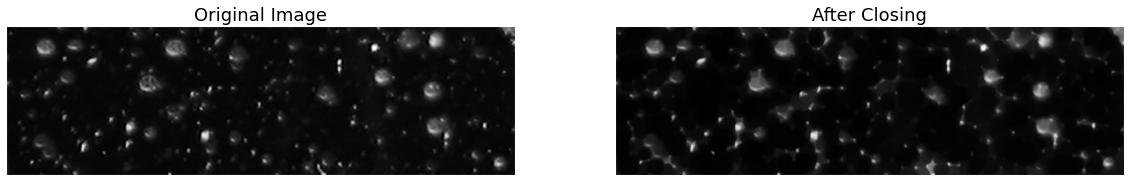

In [27]:
closing_se = disk(20)
closed = closing(snowflakes_image, opening_se)

# Show image
plt.figure(figsize=(20,10))
plt.rc('font', size=15)
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(snowflakes_image, cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('After Closing')
plt.imshow(closed, cmap='gray')
plt.axis('off')
plt.show()

### 3. Other Operators

#### 3.1. Top-Hat Filter 

Usually refers to White Top-Hat Filter. Given an image, top-hat transform will extract small elements and details which are brighter than its surroundings. It is useful in observing minor details of the inputs when they are present as light pixels on a dark background. Top-Hat is obtained from the difference between the input image and its openign by some structuring element (see equation below).
$$T_{H}(f) = f - f \circ b$$

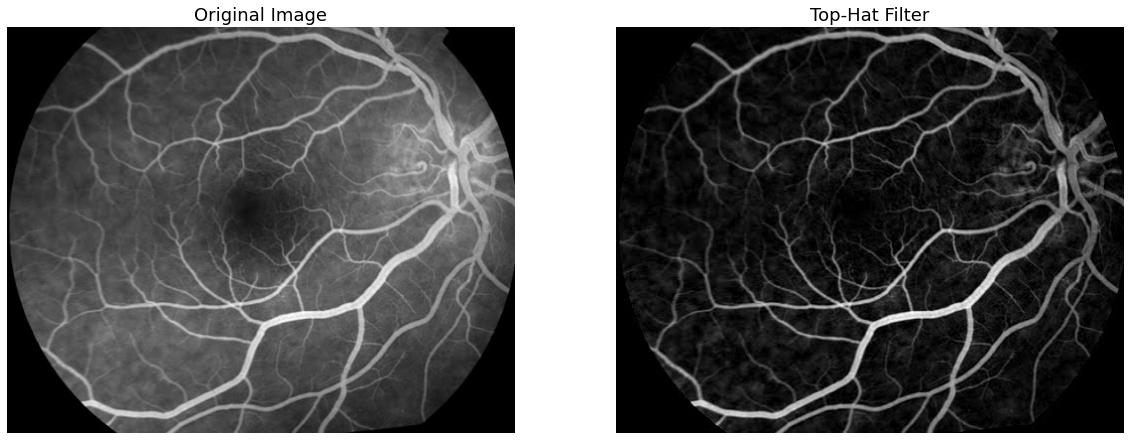

In [29]:
# Change image to RGB
retina_image = color.rgb2gray(io.imread(getPath('retina.jpg')))

# You can chage the structure element
# Read skimage.morphology documentation for more
top_hat_se = disk(20)
top_hat = white_tophat(retina_image, top_hat_se)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(retina_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Top-Hat Filter')
plt.imshow(top_hat, cmap='gray')
plt.axis('off')
plt.show()

#### 3.2. Bottom-Hat Filter 

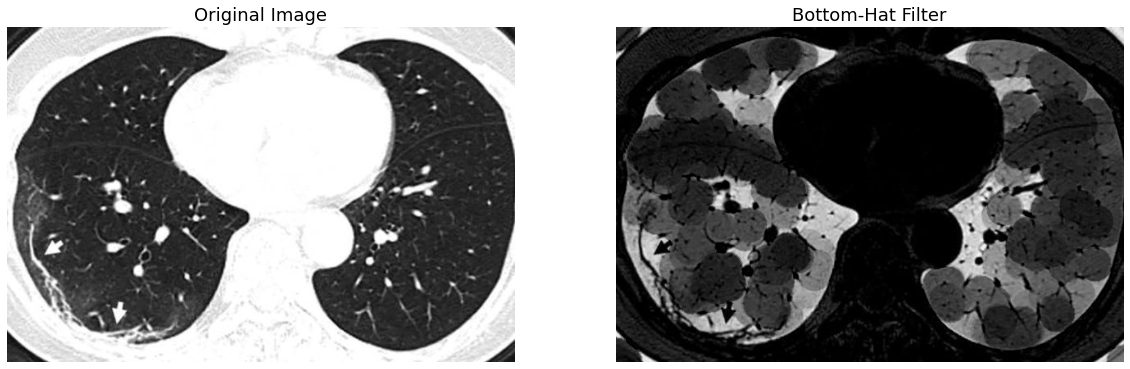

In [31]:
# Change image to RGB
covid_lung_image = color.rgb2gray(io.imread(getPath('covid_lung.jpg')))

# You can chage the structure element
# Read skimage.morphology documentation for more
bottom_hat_se = disk(20)
bottom_hat = black_tophat(covid_lung_image, bottom_hat_se)

# Show image
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(covid_lung_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Bottom-Hat Filter')
plt.imshow(bottom_hat, cmap='gray')
plt.axis('off')
plt.show()